<center><h1>This is the worksheet for the computation of the Picard Lattice for the tardigrade described in appendix B of the paper [XXX]<br>
by Eric Pichon-Pharabod</h1></center>

In [1]:
Qt.<t> = PolynomialRing(QQ)

In [2]:
K.<alpha> = NumberField(1681*x^2 - 421*x + 841)
Ring.<X,Y,Z,W,t> = K[]
F = 6124*X^4 - 24782692*X^3*Y + 24962401977*X^2*Y^2 - 20842243972*X*Y^3 + 4331388844*Y^4 + 13827992*X^3*Z - 27919677996*X^2*Y*Z - 119291704836*X*Y^2*Z + 50444249752*Y^3*Z + 7840306116*X^2*Z^2 - 1895725740*X*Y*Z^2 + 168749562396*Y^2*Z^2 + 38842829528*X*Z^3 + 168487393048*Y*Z^3 + 48321305644*Z^4 - 101996680*X^3*W + 204653103868*X^2*Y*W - 85803990572*X*Y^2*W + 10300568*Y^3*W - 115176640844*X^2*Z*W - 460049503942*X*Y*Z*W - 18769272012*Y^2*Z*W - 311785995116*X*Z^2*W - 108990818964*Y*Z^2*W - 62891049316*Z^3*W + 417760330428*X^2*W^2 - 126779372*X*Y*W^2 + 10306692*Y^2*W^2 + 179497287052*X*Z*W^2 + 37592148*Y*Z*W^2 + 22845754953*Z^2*W^2 - 101996680*X*W^3 + 12248*Y*W^3 - 22389124*Z*W^3 + 6124*W^4

In [3]:
# Project from the point Z = -alpha, Y = 1, X = 1, W = 1
F2 = F.substitute(Z = Z+alpha*W,Y=Y-W,X=X-alpha*W)

In [4]:
# This is now quadric in W. We project onto P2 from the point above. Change variables a little bit above. 
D = F2.discriminant(W).substitute(X=X-Z)

In [5]:
# Change variables one more time, so that the discriminant is quartic in Z. Change variables to Z = X, and X = t (base variable.)
G = D.substitute(Y=1).substitute(X=t,Z=X)

In [6]:
# The output of this cell is the coefficients of an expression Y^2 = X^3 + g2*X + g3 where g2 and g3 are functions of t.

B4 = G.coefficient(X^4)
B3 = G.coefficient(X^3)
B2 = G.coefficient(X^2)
B1 = G.coefficient(X)
B0 = G.substitute(X=0)

R = X^3 + B2*X^2 + (-4*B0*B4+B1*B3)*X + (B0*B3^2-4*B0*B2*B4+B1^2*B4)
R=R
R1 = R.substitute(X=X-B2/3)
g2 = R1.coefficient(X)
g3 = R1.substitute(X=0)

g2 = g2(t=1/t+1) * t^g2.degree()
g3 = g3(t=1/t+1) * t^g3.degree()

g2 = Qt(g2(X=0, Y=0, Z=0))
g3 = Qt(g3(X=0, Y=0, Z=0))

Delta = (4*g2^3 + 27*g3^2)

In [7]:
S1.<X,Y,Z> = PolynomialRing(QQ)
S2.<t> = PolynomialRing(S1)
P  =Y^2 - (X^3 + S2(g2)*X + S2(g3))
P = S2(P)

coefs = [c.homogenize(Z) for c in P.coefficients()]
P = sum([coefs[i]* Z^(3-coefs[i].degree()) * t^i for i in range(len(coefs))])

In [8]:
P = P(X=10**25*X,Y=Y,Z=100*Z)

In [9]:
os.environ["SAGE_NUM_THREADS"] = '4'

import ore_algebra

sys.path.insert(0, '../../../gits/lefschetz-family')
sys.path.insert(0, '../../../gits/numperiods')

from periods import LefschetzFamily
import numperiods
from Util import Util

In [10]:
import logging
logging.basicConfig()
logging.getLogger('periods').setLevel(logging.INFO)

### Making sure the elliptic curve above the basepoint is computed correctly

In [11]:
basepoint=-5/2

In [12]:
variety = LefschetzFamily(P(basepoint), nbits=1000, debug=True)

In [13]:
variety._fibration = (vector([1,0,0]), vector([0, 0, 1]))

In [14]:
variety.critical_points

INFO:periods:Computing critical points
INFO:periods:Critical points computed in 00:00:00


[-1.501694431194927?, -0.6523074854262903?, 2.154001916621217?]

In [15]:
variety._paths = [
    [variety.basepoint, -1-I, -1+I, variety.basepoint],
    [variety.basepoint, -1+I, -1-I, 0, -1+I, variety.basepoint],
    [variety.basepoint, -1+I, 0, -1-I, 4, -1+I, variety.basepoint],
    [variety.basepoint, -1+I, 4, -1-I, variety.basepoint],
]
variety._loops=variety._paths
variety._sps=[[] for i in range(len(variety._paths))]

In [16]:
edges=[]
for path in variety.paths:
    for i in range(len(path)-1):
        e = path[i:i+2]
        if e not in edges:
            edges.append(e)

In [17]:
variety._edges = edges

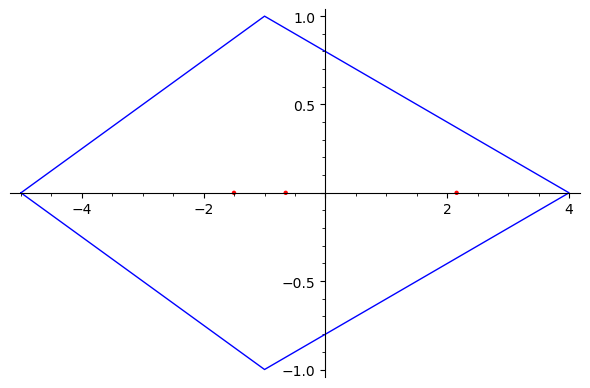

In [18]:

(
    list_plot([[z.real(), z.imag()] for z in variety.critical_points], color="red") + 
    list_plot([[z.real(), z.imag()] for z in variety.paths[3]], True)
)

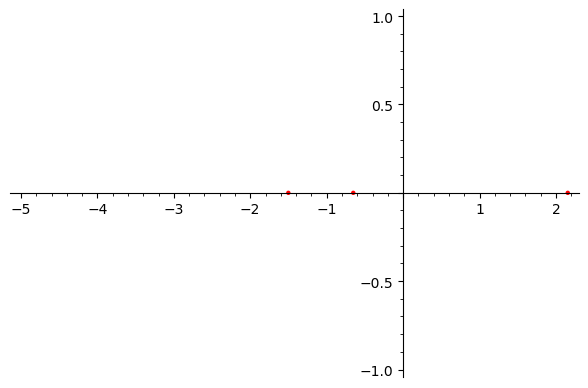

In [19]:
paths = variety.paths
pathtot = []
for p in paths:
    pathtot= pathtot+p
pathtot = Util.simplify_path(pathtot)
pathtot

(
    list_plot([[z.real(), z.imag()] for z in variety.critical_points], color="red") + 
    list_plot([[z.real(), z.imag()] for z in pathtot], True)
)

In [20]:
variety._monodromy_matrices = [matrix([[0,1],[1,0]])]*4

In [21]:
variety._homology = [vector([1,0,-1,0]), vector([0,1,-1,0])]

In [22]:
variety.period_matrix

INFO:periods:Computing Picard-Fuchs equations of 2 forms in dimension 1
INFO:periods:Operator [1/2] has order 1 and degree 3 for form with numerator of degree 0
INFO:periods:Operator [2/2] has order 1 and degree 6 for form with numerator of degree 3
INFO:periods:Computing numerical transition matrices of operator of order 2 and degree 3 (14 edges total).
INFO:periods:Computation of edges finished -- total time: 00:00:02.
INFO:periods:Computing numerical transition matrices of operator of order 2 and degree 6 (14 edges total).
INFO:periods:Computation of edges finished -- total time: 00:00:02.


[  [-5.54497040138481814302232372995582442654586935432389160080366098173330370272997026698824833962116386836580914125944733501568962282341157855991533821164e-39 +/- 6.63e-189] + [-7.2421954374401662118913994822459233182041821451654366596888715934318409262404856107548843796550857438554052087056085487620033508496862344044425407222e-39 +/- 1.12e-188]*I                                                                                                                                                                [+/- 9.75e-189] + [-7.2421954374401662118913994822459233182041821451654366596888715934318409262404856107548843796550857438554052087056085487620033508496862344044425407222e-39 +/- 1.12e-188]*I]
[[-1.58980297740448127888362398579677011431670874186108890593429353480784027413165190487715992943669775132543616075556838698152257799295625160251407611870e-115 +/- 4.11e-265] + [1.43098199190123671069078733066937191467049934702448856977987457323986532392158745578126516225710279253792918396580669

## The K3 surface

In [23]:
from numperiods import Family

In [24]:
K3 = LefschetzFamily(P(1), debug=True)

In [25]:
K3._critical_points = Qt(Delta).roots(QQbar, multiplicities=False)

In [26]:
K3._family = Family(P)

In [27]:
assert K3.basepoint == basepoint

In [28]:
K3.basepoint

-5/2

In [29]:
K3._fiber = variety

In [30]:
len(K3.critical_points)

17

INFO:periods:Computing homotopy representants of the image of the projection in dimension 1
INFO:periods:Computing Voronoi Diagram of 17 points
INFO:periods:Voronoi diagram computed. Extracting edges.
INFO:periods:Edges are computed.


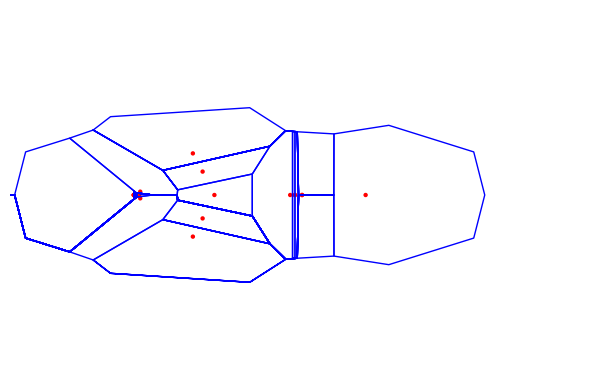

In [31]:
zoom=1.7
sum([list_plot([[p.real(), p.imag()] for p in path], True, xmin=-zoom, xmax=zoom, ymin=-zoom, ymax=zoom) for path in K3.paths], axes=False)+ list_plot([[p.real(), p.imag()] for p in K3.critical_points], color="red", axes=False)

We manually removed the critical point around -1700 because it was messing with the numerics to compute the fiber. Now that we have a reasonable choice of basepoint, we may add it back

In [32]:
L = K3.family.picard_fuchs_equation(vector([1,0]))

In [33]:
K3.ctx.nbits = 1000
ntms = K3.integrate(L*L.parent()('Dt'))

INFO:periods:Computing numerical transition matrices of operator of order 3 and degree 28 (36 edges total).
INFO:periods:Computation of edges finished -- total time: 00:00:35.


In [34]:
derivatives_at_basepoint = K3.family._coordinates([P.parent()(0),P.parent()(1), - K3.family.pol.derivative()], K3.basepoint)
integration_correction = diagonal_matrix([1/ZZ(factorial(k)) for k in range(3)])
initial_conditions = integration_correction * derivatives_at_basepoint*K3.fiber.period_matrix

In [35]:
monodromy_matrices=  [(initial_conditions.submatrix(1,0)**-1*M.submatrix(1,1)*initial_conditions.submatrix(1,0)).change_ring(ZZ) for M in ntms]

In [36]:
[(M-1).rank() for M in monodromy_matrices]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [37]:
K3._monodromy_matrices = monodromy_matrices

In [38]:
multiplicities = [gcd((M-1).image().gens()[0]) for M in monodromy_matrices]
multiplicities

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 4, 1, 1]

In [39]:
singular_indices=[]
for i in range(len(multiplicities)):
    if multiplicities[i]!=1:
        singular_indices+=[i]

In [40]:
for i in singular_indices:
    print(K3.critical_points[i], ":",multiplicities[i])

0 : 4
-0.50000000000000000? : 2
-1 : 4


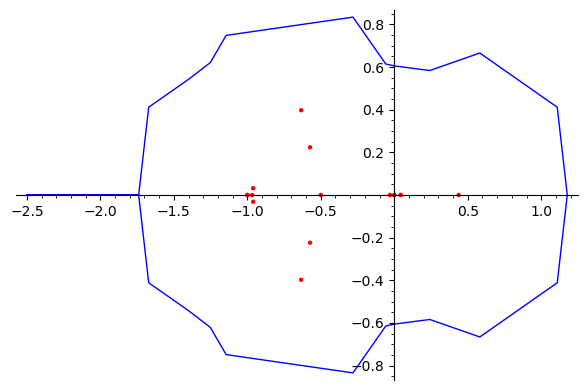

In [41]:
from Util import Util

paths = K3.paths
pathtot = []
for p in paths:
    pathtot= pathtot+p
pathtot = Util.simplify_path(pathtot)
pathtot

(
    list_plot([[z.real(), z.imag()] for z in K3.critical_points], color="red") + 
    list_plot([[z.real(), z.imag()] for z in pathtot], True)
)

We also need to deal with the $I_4$ at $\infty$. Again we add the paths manually and compute the monodromy matrix.

##### We now have all the monodromy matrices. We may reconstruct the cycles.

In [42]:
boundaries= []
permuting_cycles=[]
for M in monodromy_matrices:
    for i in range((M-1).rank()):
        D, U, V = (M-1).smith_form()
        v = V*vector([1 if j==i else 0 for j in range(2)])
        permuting_cycles+=[v]
        boundaries+=[(M-1)*v]
boundaries=matrix(boundaries)

We check that we have the correct number of critical points. Each $I_i$ contributes $i$ to the dimension, and we also need to remove 2 cycles when canceling boundaries, and 2 when removing loops around regular points. Finally we also need to add the fiber and section.

In [43]:
len(monodromy_matrices) - 2*2+1 + 3*2+1+1

22

In [44]:
Nthimbles = sum([(M-1).rank() for M in monodromy_matrices])
Nthimbles

17

In [45]:
# cycles = (quotient_basis*boundaries.kernel().basis_matrix()).transpose()
cycles = (boundaries.kernel().basis_matrix()).transpose()

We have 2 too many cycles, which are loops around a regular point (extension of cycles of the fiber around the composition of the loops). To recover the Picard rank and compute the periods, we do not need to remove them yet

In [46]:
show(cycles.transpose())

[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
[ 0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  1  3]
[ 0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  1  3]
[ 0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  1  3]
[ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  2]
[ 0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  1  3]
[ 0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  1  2]
[ 0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  1  3]
[ 0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  1  3]
[ 0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  1  3]
[ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  2  6]
[ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  1  3]
[ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  2  5]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  2  4]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2  2]

In [47]:
cycles.dimensions()

(17, 15)

We find $15-2=13$ cycles, plus $2\times 3 + 1 = 7$ cycles coming from singularities, + 1 section + 1 fiber makes 22?

### Computing periods 

In [48]:
derivatives = derivatives_at_basepoint

In [49]:
integration_correction = diagonal_matrix([1/ZZ(factorial(k)) for k in range(3)])

In [50]:
initial_conditions = integration_correction* derivatives*K3.fiber.period_matrix

In [51]:
integrated_thimbles=[]
pci=0
for i in range(len(monodromy_matrices)):
    M=monodromy_matrices[i]
    for j in range((M-1).rank()):
        integrated_thimbles+=[(ntms[i]*initial_conditions*permuting_cycles[pci])[0]]
        pci +=1

In [52]:
periods = vector(integrated_thimbles)*cycles
show(periods)

([3.1780106706151430342031559761809625790840914977530700729364336930720846550803289287826953611928839222249042018138178742324679920563039499432976544e-38 +/- 1.37e-184] + [2.817966574912509166790457024552798175784351772172486223154224505605668483333751064611993607352368158681224916558485228999012540984129253413177515e-39 +/- 5.03e-184]*I, [-2.74075092224388929539463713936222396701086993759258412381741472355084237297727636530788225500269210459649765946749220789141357197570521109340009925e-37 +/- 4.83e-184] + [-9.3116436034967699115829643752385860788364412425956612372734766275434099547506499437427579016164878189073294962131847522210665307888827412070479175e-38 +/- 4.29e-184]*I, [-2.19832297368788676232302858116861891719963541944291016231163230031510419563359100937276997238871958288168848718021267100130248624649054893554558191e-37 +/- 7.93e-184] + [-6.8316642885044553882891486689192730661263882144016831119792557750329143311353526005265943226979474524202336741031937159551061924727225708261997159e-38 +/- 4.47e-184]*I, [-2.74075092224388929539463713936222396701086993759258412381741472355084237297727636530788225500269210459649765946749220789141357197570521109340009925e-37 +/- 4.74e-184] + [-7.8927448974127136897385945479853365974173324177856226245123172554247898050383401853419097880418771721177892813575712315306570201079135599520787090e-38 +/- 5.47e-184]*I, [-7.3558295399054776442929651315642479966753785960938991468894022193900478819687030742596478997324684198901519296780197122329905858374922490573220751e-38 +/- 7.65e-184] + [-2.7748366991529621807915251869987690935918085580055060912067384398841348992196699315927608054668419297568945811580471458904085094574854811400146220e-37 +/- 9.58e-184]*I, [-3.47212093209255879434150317336832102577691871750934424762876076273889207669563671628128484621042847504283430657369755778041528580707587310830678645e-37 +/- 5.33e-184] + [-1.8519978673146321537981642144655144608139883757231919393726951624038671976936873242638854148824644624734906129883689055664313919565632984300827830e-38 +/- 4.43e-184]*I, [-7.3558295399054776442929651315642479966753785960938991468894022193900478819687030742596478997324684198901519296780197122329905858374922490573220751e-38 +/- 4.37e-184] + [-2.90367715438617521283553246795426457615752036013437556068092346601240824932236364272690947480804101283061914412571433186707139783345922591475935001e-37 +/- 4.50e-184]*I, [-4.20349094194122829328836920737441808454296749742610437144010680192694178041399706725468743741816484548917095367990290766941699963844653512321347365e-37 +/- 8.32e-184] + [-7.8927448974127136897385945479853365974173324177856226245123172554247898050383401853419097880418771721177892813575712315306570201079135599520787090e-38 +/- 5.93e-184]*I, [-4.74591889049723082635997776556802313435420201557577833294588922516267995775768242318979972003213736720398012596718244455952808536766119728106799099e-37 +/- 5.73e-184] + [-6.8316642885044553882891486689192730661263882144016831119792557750329143311353526005265943226979474524202336741031937159551061924727225708261997159e-38 +/- 4.90e-184]*I, [-4.20349094194122829328836920737441808454296749742610437144010680192694178041399706725468743741816484548917095367990290766941699963844653512321347365e-37 +/- 8.34e-184] + [-9.3116436034967699115829643752385860788364412425956612372734766275434099547506499437427579016164878189073294962131847522210665307888827412070479175e-38 +/- 4.66e-184]*I, [-6.9442418641851175886830063467366420515538374350186884952575215254777841533912734325625696924208569500856686131473951155608305716141517462166135729e-37 +/- 1.09e-183] + [-1.48970181073970780630979916605170173660589383549020277835690063321969293059522341061970621538695182951613576469073760518786860486973707866065416687e-37 +/- 6.09e-184]*I, [-3.47212093209255879434150317336832102577691871750934424762876076273889207669563671628128484621042847504283430657369755778041528580707587310830678645e-37 +/- 5.41e-184] + [-7.47586656467052054850918507369675047895494722

### Computing the Picard rank

In [53]:
IR = numperiods.IntegerRelations(matrix(periods).transpose())

In [54]:
IR.basis.dimensions()

(4, 15)

In [55]:
22-(IR.basis.dimensions()[1]-IR.basis.dimensions()[0])

11

### Computing homology of desgingularization

We formally take a smoothing of the variety to get the cycles are pinched at the singularities

In [56]:
monodromy_matrices_smoothed = []
for M in monodromy_matrices:
    monodromy_matrices_smoothed += [(1+(M-1)/gcd((M-1).image().gens()[0])).change_ring(ZZ)]*gcd((M-1).image().gens()[0])

In [57]:
show(monodromy_matrices)

[
[ 1  0]  [ 3  1]  [ 3  1]  [ 3  1]  [ 7  4]  [ 3  1]  [ 2  1]  [ 3  1]
[-1  1], [-4 -1], [-4 -1], [-4 -1], [-9 -5], [-4 -1], [-1  0], [-4 -1],

[ 3  1]  [ 3  1]  [  9   4]  [ 3  1]  [ 29  16]  [ 13   8]  [ 5  4]
[-4 -1], [-4 -1], [-16  -7], [-4 -1], [-49 -27], [-18 -11], [-4 -3],

[ 3  4]  [ 1  0]
[-1 -1], [-1  1]
]

In [58]:
show(monodromy_matrices_smoothed)

[
[ 1  0]  [ 3  1]  [ 3  1]  [ 3  1]  [ 7  4]  [ 3  1]  [ 2  1]  [ 3  1]
[-1  1], [-4 -1], [-4 -1], [-4 -1], [-9 -5], [-4 -1], [-1  0], [-4 -1],

[ 3  1]  [ 3  1]  [ 3  1]  [ 3  1]  [ 3  1]  [ 3  1]  [ 3  1]
[-4 -1], [-4 -1], [-4 -1], [-4 -1], [-4 -1], [-4 -1], [-4 -1],

[ 29  16]  [ 7  4]  [ 7  4]  [ 2  1]  [ 2  1]  [ 2  1]  [ 2  1]
[-49 -27], [-9 -5], [-9 -5], [-1  0], [-1  0], [-1  0], [-1  0],

[ 3  4]  [ 1  0]
[-1 -1], [-1  1]
]

In [59]:
boundaries_smoothed= []
permuting_cycles_smoothed=[]
for M in monodromy_matrices_smoothed:
    for i in range((M-1).rank()):
        D, U, V = (M-1).smith_form()
        v = V*vector([1 if j==i else 0 for j in range(2)])
        permuting_cycles_smoothed+=[v]
        boundaries_smoothed+=[(M-1)*v]
boundaries_smoothed=matrix(boundaries_smoothed)

In [60]:
len(monodromy_matrices_smoothed) - 2*2+1+1

22

In [61]:
cycles_smoothed = (boundaries_smoothed.kernel().basis_matrix())
cycles_smoothed.dimensions()

(22, 24)

In [62]:
def subdivide_matrix(M, l):
    assert sum(l) == M.ncols()
    res = []
    s=0
    for i in l:
        res+=[M.submatrix(0,s,M.nrows(), i)]
        s+=i
    return block_matrix([res])

In [63]:
groups=[0]
added_cycles=0
for i in singular_indices:
    groups+=[[]]
    groups[-1]+=[i+added_cycles]
    added_cycles+=multiplicities[i]-1
    groups[-1]+=[i+added_cycles+1]
groups+=[24]
print(groups)

[0, [10, 14], [16, 18], [18, 22], 24]


In [64]:
diffs=  [b-a for a,b in zip(flatten(groups)[:-1], flatten(groups)[1:])]

In [65]:
decomp_mat = subdivide_matrix(cycles_smoothed, diffs)
show(decomp_mat)
decomp_mat.dimensions()

22 x 24 dense matrix over Integer Ring (use the '.str()' method to see the entries)

(22, 24)

We now decompose the cycles we get in the singular version in this basis. This way we will see which cycles we miss.

In [66]:
# this matrix converts thimbles of singular into thimbles of smoothed
convert=zero_matrix(24,17)
i=0
for k,m in zip(range(len(multiplicities)),multiplicities):
    for j in range(m):
        convert[i,k]=1
        i+=1

In [67]:
cycles_dec=[]
for r in cycles.transpose().rows():
    cycles_dec+=[convert*r]
for interval in groups[1:-1]:
    for j in range(interval[0], interval[-1]-1):
        cycles_dec+=[vector([-1 if i==j+1 else 1 if i==j else 0 for i in range(24)])]
cycles_dec = matrix(cycles_dec)

In [68]:
cycles_dec.dimensions()

(22, 24)

In [69]:
sl = cycles_smoothed.solve_left(matrix(cycles_dec))
sl.determinant(), sl.dimensions()

(32, (22, 22))

### Computing periods of the smoothed basis

In [70]:
periods_smoothed = sl.inverse()*vector(list(periods) + [0]*7)

In [71]:
IRsmoothed = numperiods.IntegerRelations(matrix(periods_smoothed).transpose())

In [72]:
IRsmoothed.basis.dimensions()

(11, 22)

We find the same Picard rank, which is expected as these periods are just rational linear combinations of the pervious ones

In [73]:
22-(IRsmoothed.basis.dimensions()[1]-IRsmoothed.basis.dimensions()[0])

11

In [74]:
alg_cycles = IRsmoothed.basis*boundaries_smoothed.kernel().basis_matrix()

### Identifying components

In [75]:
def get_complement(Mat, sigma=None):
    totdim = Mat.ncols()
    if sigma==None:
        sigma = [i for i in range(totdim)]
        shuffle(sigma)
        print(sigma)
    
    rank = Mat.rank()
    assert rank == Mat.nrows(), "matrix did not represent an independant family"
    compl = [[0 for i in range(totdim)]]
    N=0
    for i in range(totdim):
        v=[1 if j==sigma[i] else 0 for j in range(totdim)]
        M=block_matrix([[Mat],[matrix(compl)],[matrix([v])]],subdivide=False)
        if rank+N+1==M.rank():
            compl += [v]
            N+=1
        if rank+N == totdim:
            break
    res = matrix(compl[1:])
    print(block_matrix([[res],[Mat]]).determinant())
    return res

The following gives a complement of the picard Lattice

In [76]:
sigma = [11, 0, 19, 2, 15, 5, 10, 7, 9, 6, 18, 1, 17, 20, 13, 8, 3, 14, 21, 16, 12, 4]
compl_tot =get_complement(IRsmoothed.basis, sigma=sigma)*boundaries_smoothed.kernel().basis_matrix()

-1


In [77]:
compl_tot.dimensions()

(11, 24)

### Removing two loops at infinity

In [78]:
def concatenate(v1,v2):
    res = []
    for i in v1:
        res+=[i]
    for i in v2:
        res+=[i]
    return vector(res)

In [79]:
infinity_loops=[]
for j in range(2):
    v = vector([1 if i==j else 0 for i in range(2)])
    coefs=vector([])
    bounds = []
    for M in monodromy_matrices_smoothed:
        D, U, V = (M-1).smith_form()
        b = (M-1)*v
        bounds+=[b]
        coefs = concatenate(coefs, D.submatrix(0,0,D.rank(),D.rank())**-1*(U*b)[:(M-1).rank()])
        v = M*v
    infinity_loops += [coefs]
infinity_loops=matrix(infinity_loops)

In [80]:
sigma=[6, 1, 0, 10, 3, 9, 8, 5, 4, 2, 7]
compl_alg = get_complement(alg_cycles.solve_left(block_matrix([[infinity_loops],[cycles_dec[15:]]])), sigma=sigma)*alg_cycles

-1


In [81]:
compl_alg.dimensions()

(2, 24)

In [82]:
block_matrix([[compl_alg], [cycles_dec[15:]]])

[ 0  0 -1  0  1  0 -1  0 -1  0  0  0  0  0  1  0  0  0  1  0  0 -1  0  0]
[ 1  0  1  1  0  1 -1 -1  0  0 -1  0 -1  0 -1  1  0  0  0  0  0 -2  0  1]
[-----------------------------------------------------------------------]
[ 0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0]

In [83]:
picard_lattice = block_matrix([[compl_alg], [cycles_dec[15:]]])

In [84]:
full_lattice = block_matrix([[compl_tot],[picard_lattice]])

In [85]:
full_lattice.dimensions()

(20, 24)

### Computing intersection products

In [86]:
K3.fiber.fiber._intersection_product = identity_matrix(2)

In [87]:
intersection_product_thimbles = matrix([[variety._compute_intersection_product_thimbles(i,j) for j in range(len(variety.monodromy_matrices))] for i in range(len(variety.monodromy_matrices))])

In [88]:
K3.fiber._intersection_product = matrix(variety.homology)*intersection_product_thimbles*matrix(variety.homology).transpose()

In [90]:
def compute_intersection_product_thimbles(i,j):
    vi = permuting_cycles_smoothed[i]
    Mi = monodromy_matrices_smoothed[i]
    vj = permuting_cycles_smoothed[j]
    Mj = monodromy_matrices_smoothed[j]

    di, dj = (Mi-1)*vi, (Mj-1)*vj


    res = -di*K3.fiber.intersection_product*dj
    resid = vi*K3.fiber.intersection_product*di

    if i==j:
        return resid
    if i<j:
        return res
    else:
        return 0

In [91]:
intersection_product_thimbles = matrix([[compute_intersection_product_thimbles(i,j) for j in range(len(monodromy_matrices_smoothed))] for i in range(len(monodromy_matrices_smoothed))])

In [92]:
inter_product_extensions = full_lattice*intersection_product_thimbles*full_lattice.transpose()

In [93]:
show(inter_product_extensions)
assert inter_product_extensions.is_symmetric()
inter_product_extensions.determinant()

20 x 20 dense matrix over Integer Ring (use the '.str()' method to see the entries)

1

In [94]:
ip_sf = matrix([[0,1],[1,-2]])

In [95]:
ip_tot = block_matrix([[inter_product_extensions, zero_matrix(20,2)],[zero_matrix(2,20), ip_sf]], subdivide=False)
show(ip_tot)
ip_tot.determinant()

22 x 22 dense matrix over Integer Ring (use the '.str()' method to see the entries)

-1

### Trying to find a change of basis to make this matrix pretty

In [96]:
CB = Permutation([1,2,3,4,5,6,7,8,9,10,11,12,13,22,17,14,15,16,18,19,20,21]).to_matrix()

In [97]:
CB2 = identity_matrix(22)

CB2[21,11] = 2
CB2[13,11] = 1

CB2[21,12] = 2
CB2[13,12] = 1

In [98]:
CB3 = identity_matrix(22)

CB3[16,12] = -1
CB3[20,12] = -1

CB3[18,11] = -1
CB3[19,11] = -1
CB3[20,11] = -1

CB3[18,18] = -1
CB3[19,19] = -1
CB3[20,20] = -1

In [99]:
CB4 = Permutation([1,3,4,2,5,6,7,8,9,10,11,13,12,14,15,16,17,18,19,20,21,22]).to_matrix()

In [100]:
CB5 =identity_matrix(22)

CB5[2,0] = -1
CB5[2,1] = -1
CB5[2,5] = -1
CB5[2,6] = -1
CB5[2,7] = -1
CB5[2,8] = -1
CB5[2,9] = -1

In [101]:
CB6 =identity_matrix(22)

CB6[7,0] = -1
CB6[7,1] = -1
CB6[7,2] = 1
CB6[7,6] = -1
CB6[7,9] = -1
CB6[7,7] = -1

In [102]:
CB7 =identity_matrix(22)

CB7[9,0] = -1
CB7[9,6] = -1

CB7[2,0] = 1

In [103]:
CB8 = Permutation([10,8,11,1,2,3,4,5,6,7,9,12,13,14,15,16,17,18,19,20,21,22]).to_matrix()

In [104]:
CB9=identity_matrix(22)
CB9[5,3]=-1

In [105]:
CBtot = CB*CB2*CB3*CB4*CB5*CB6*CB7*CB8*CB9
CBmat = CBtot.transpose()*ip_tot*CBtot
show(CBmat)

22 x 22 dense matrix over Integer Ring (use the '.str()' method to see the entries)

In [106]:
CBmat.determinant()

-1

In [107]:
IL = IntegralLattice(ip_tot)

In [108]:
IL.genus()

Genus
Signature:  (3, 19)
Genus symbol at 2:    1^22